Dataset shape: (5600, 7)

First 5 rows:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7
0  -3.963840  10.465318   4.966742   3.464064  -6.802630 -11.656694  -6.478501
1  -3.857778  14.116635   5.940324   0.210320  -4.071295  -8.864197  -9.945718
2  -8.604347  -1.001196   0.660220  -1.021466   4.560815  -9.463430   0.735008
3  -5.111494  -4.900907  -2.705618   2.200669   3.136735  -6.178880  -1.464122
4  -7.870395  -4.497651   2.714391  -3.598401   3.613323  -3.197530  -2.828238

Data has been standardized.

Evaluating K-Means for k from 2 to 10...


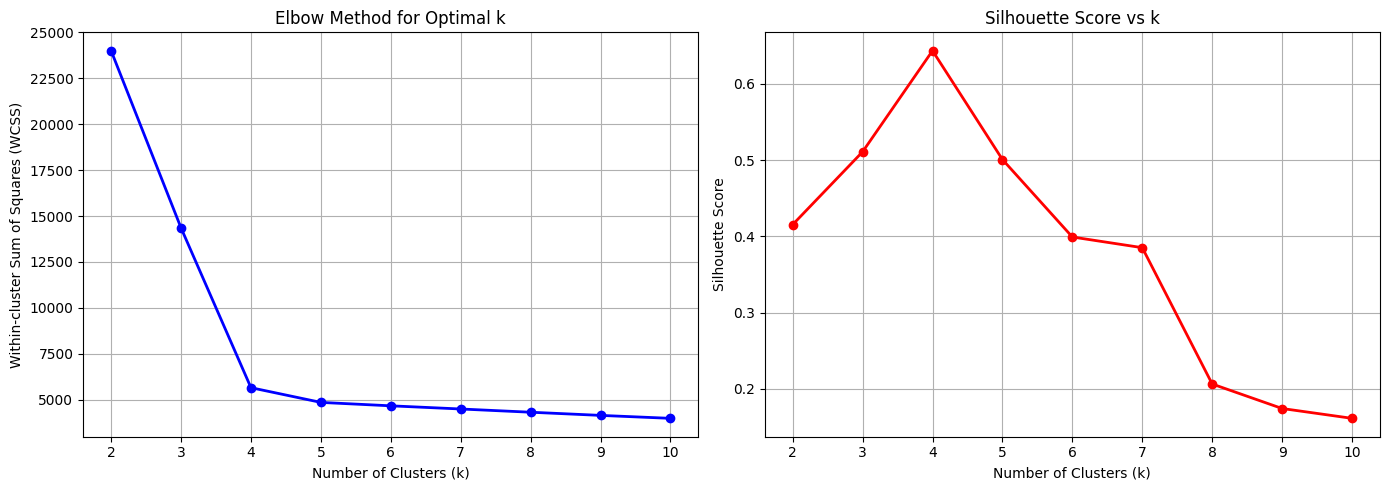


Best k based on Silhouette Score: 4

K-Means clustering completed with k = 4
K-Means Cluster distribution:
KMeans_Cluster
0    1120
1    2240
2    1120
3    1120
Name: count, dtype: int64

First 10 rows with K-Means cluster labels:
   KMeans_Cluster  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0               2  -3.963840  10.465318   4.966742   3.464064  -6.802630   
1               2  -3.857778  14.116635   5.940324   0.210320  -4.071295   
2               1  -8.604347  -1.001196   0.660220  -1.021466   4.560815   
3               1  -5.111494  -4.900907  -2.705618   2.200669   3.136735   
4               1  -7.870395  -4.497651   2.714391  -3.598401   3.613323   
5               2  -4.523376   7.699819   2.765167  -1.366389  -3.350253   
6               3  11.147369  -1.981985   1.824157 -10.478425  10.481983   
7               1 -10.541738  -7.187515  -1.750122  -0.664341   7.284452   
8               3   9.627494  -0.060633   4.490009 -10.789597   7.624973   
9      

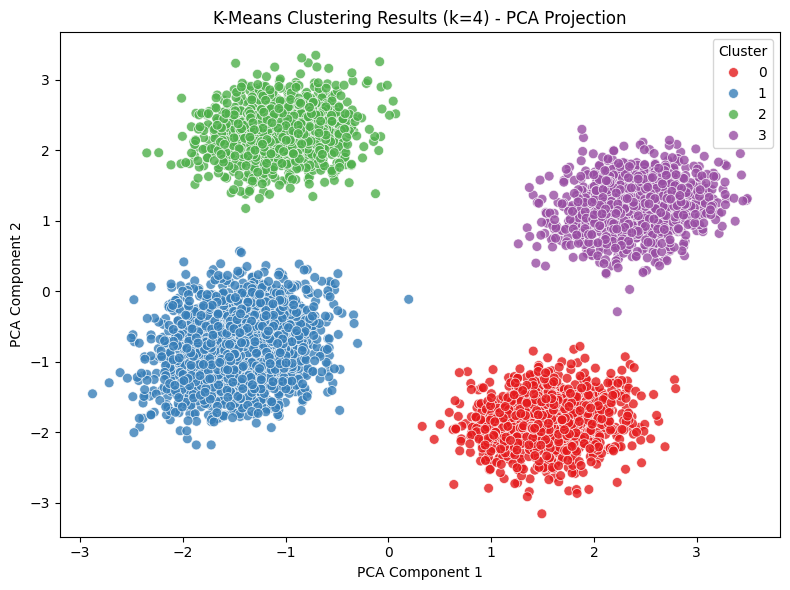


 Final DataFrame shape: (5600, 8)
Each row now has a K-Means cluster label in the 'KMeans_Cluster' column.
Access labels: df['KMeans_Cluster']


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# -----------------------------------------------
# Step 1: Use the same dataset (5600 rows, 7 columns)
# -----------------------------------------------
X, _ = make_blobs(n_samples=5600, centers=5, n_features=7, cluster_std=2.0, random_state=42)

# Convert to DataFrame (we'll assume df from previous step, or recreate)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(7)])

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# -----------------------------------------------
# Step 2: Standardize the data
# -----------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("\nData has been standardized.")

# -----------------------------------------------
# Step 3: Find the best k using Elbow Method and Silhouette Analysis
# -----------------------------------------------

# Range of k values to test
k_range = range(2, 11)  # Test k from 2 to 10

# Lists to store results
inertias = []
silhouette_scores = []

print("\nEvaluating K-Means for k from 2 to 10...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42, max_iter=300)
    kmeans.fit(X_scaled)
    
    inertias.append(kmeans.inertia_)  # WCSS (Within-cluster sum of squares)
    
    # Silhouette score (slower for large data — sample if needed)
    if k > 1:
        # Use a sample for silhouette to save time (optional)
        sample_size = 1000
        indices = np.random.choice(X_scaled.shape[0], size=sample_size, replace=False)
        X_sample = X_scaled[indices]
        score = silhouette_score(X_sample, kmeans.labels_[indices])
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

# -----------------------------------------------
# Step 4: Plot Elbow and Silhouette
# -----------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=6)
ax1.set_title('Elbow Method for Optimal k')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-cluster Sum of Squares (WCSS)')
ax1.grid(True)

# Silhouette Analysis
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=6)
ax2.set_title('Silhouette Score vs k')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

plt.tight_layout()
plt.show()

# -----------------------------------------------
# Step 5: Choose best k
# -----------------------------------------------
# Find k with highest silhouette score
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\nBest k based on Silhouette Score: {best_k_silhouette}")

# Optional: Elbow "knee" detection (manual or use kneed library)
# For this example, we'll go with silhouette

# -----------------------------------------------
# Step 6: Apply K-Means with best k and add labels to df
# -----------------------------------------------
final_k = best_k_silhouette  # or set to 5 if you know it from data

kmeans_final = KMeans(n_clusters=final_k, init='k-means++', n_init=10, random_state=42)
cluster_labels_kmeans = kmeans_final.fit_predict(X_scaled)

# Add K-Means cluster labels to df
df['KMeans_Cluster'] = cluster_labels_kmeans

print(f"\nK-Means clustering completed with k = {final_k}")
print("K-Means Cluster distribution:")
print(df['KMeans_Cluster'].value_counts().sort_index())

# Optional: Show first 10 rows with K-Means labels
print("\nFirst 10 rows with K-Means cluster labels:")
print(df[['KMeans_Cluster'] + [f'Feature_{i+1}' for i in range(7)]].head(10))

# -----------------------------------------------
# Step 7: (Optional) Visualize clusters using PCA
# -----------------------------------------------
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df['KMeans_Cluster'],
    palette='Set1',
    s=50,
    alpha=0.8
)
plt.title(f'K-Means Clustering Results (k={final_k}) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# -----------------------------------------------
# Final Output
# -----------------------------------------------
print(f"\n Final DataFrame shape: {df.shape}")
print("Each row now has a K-Means cluster label in the 'KMeans_Cluster' column.")
print("Access labels: df['KMeans_Cluster']")

Dataset shape: (5600, 7)

First 5 rows:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7
0  -3.963840  10.465318   4.966742   3.464064  -6.802630 -11.656694  -6.478501
1  -3.857778  14.116635   5.940324   0.210320  -4.071295  -8.864197  -9.945718
2  -8.604347  -1.001196   0.660220  -1.021466   4.560815  -9.463430   0.735008
3  -5.111494  -4.900907  -2.705618   2.200669   3.136735  -6.178880  -1.464122
4  -7.870395  -4.497651   2.714391  -3.598401   3.613323  -3.197530  -2.828238

Data has been standardized.

Agglomerative Clustering completed in 0.56 seconds.
Number of clusters: 5
Cluster labels distribution:
0    1120
1    1120
2    1131
3    1120
4    1109
Name: count, dtype: int64

First 10 rows with cluster labels:
   Cluster  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        0  -3.963840  10.465318   4.966742   3.464064  -6.802630 -11.656694   
1        0  -3.857778  14.116635   5.940324   0.210320  -4.071295  -8.864197   
2

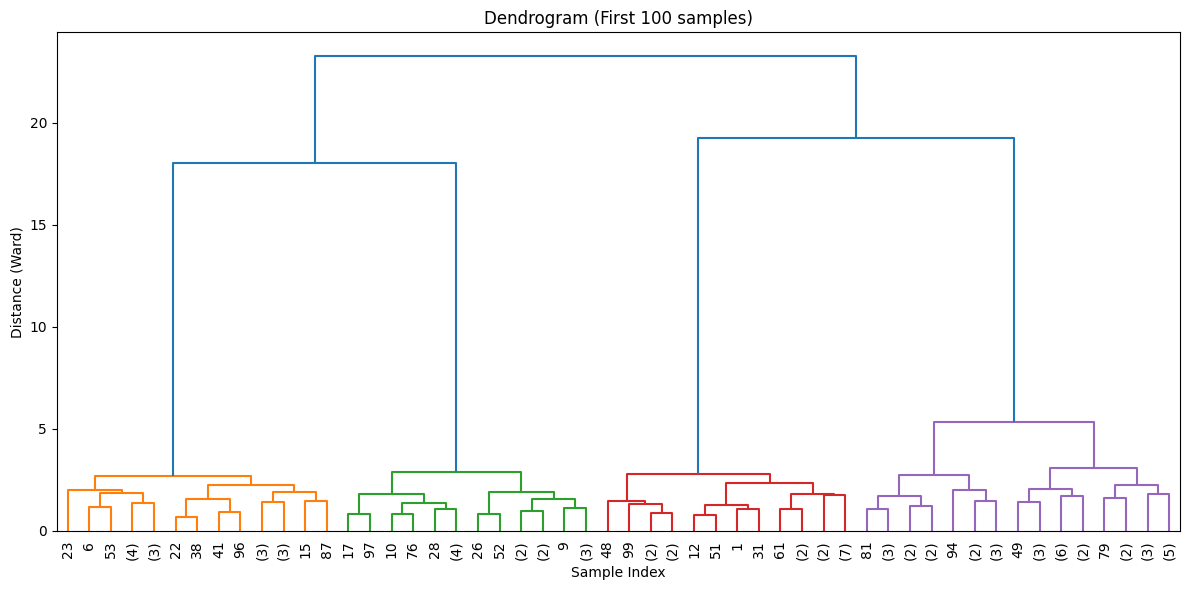


Cluster Centers (in original scale):
    Cluster  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6
0 -2.560604   8.875190   4.702580   1.934015  -6.866507  -6.864285  -8.910437
1  1.904499  -9.011857   2.156250  -6.616969  -8.808082   8.925085   9.304248
2 -6.298952  -6.329187  -3.796462   0.449944  -1.264385  -4.110724   2.280547
3  7.208236   2.020195   4.262339  -9.477774   9.295913   6.615678  -5.717075
4 -7.290780  -4.024803  -2.730558  -0.887084   5.735089  -6.088124   0.369006

Final DataFrame shape (with labels): (5600, 8)
Each row is now assigned to a cluster. Access via df['Cluster']

Final cluster distribution:
Cluster
0    1120
1    1120
2    1131
3    1120
4    1109
Name: count, dtype: int64


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import time

# Set random seed for reproducibility
np.random.seed(42)

# -----------------------------------------------
# Step 1: Generate synthetic dataset (5600 rows, 7 columns)
# You can replace this with your own data loading, e.g., pd.read_csv('your_data.csv')
# ------------------------------------------------
X, _ = make_blobs(n_samples=5600, centers=5, n_features=7, cluster_std=2.0, random_state=42)

# Convert to DataFrame for convenience
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(7)])

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# ------------------------------------------------
# Step 2: Preprocess the data (Standardization)
# ------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("\nData has been standardized.")

# ------------------------------------------------
# Step 3: Apply Agglomerative Clustering
# ------------------------------------------------
n_clusters = 5  # You can choose based on domain or dendrogram

start_time = time.time()
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clustering_model.fit_predict(X_scaled)
end_time = time.time()

print(f"\nAgglomerative Clustering completed in {end_time - start_time:.2f} seconds.")
print(f"Number of clusters: {n_clusters}")
print("Cluster labels distribution:")
print(pd.Series(cluster_labels).value_counts().sort_index())

# Add cluster labels to the original data
df['Cluster'] = cluster_labels

# Optional: Reorder columns to put 'Cluster' first
df = df[['Cluster'] + [col for col in df.columns if col != 'Cluster']]

print("\nFirst 10 rows with cluster labels:")
print(df.head(10))

# ------------------------------------------------
# Step 4: Plot Dendrogram (on a small sample for performance)
# ------------------------------------------------
sample_size = 100  # Reduce size for faster dendrogram
X_sample = X_scaled[:sample_size]

# Use scipy's linkage to compute the linkage matrix for dendrogram
linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram (First 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.tight_layout()
plt.show()

# ------------------------------------------------
# Step 5: Analyze Clusters (e.g., cluster centers in original scale)
# ------------------------------------------------
# Inverse transform to get cluster centers in original scale
cluster_centers_scaled = np.array([X_scaled[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

centers_df = pd.DataFrame(cluster_centers_original, columns=df.columns[:-1])  # Exclude 'Cluster'
print("\nCluster Centers (in original scale):")
print(centers_df)

# Final Output: df now contains a 'Cluster' column labeling each of the 5600 rows
print(f"\nFinal DataFrame shape (with labels): {df.shape}")
print("Each row is now assigned to a cluster. Access via df['Cluster']")

# Optional: Save results to CSV
# df.to_csv('clustered_data_with_labels.csv', index=False)
# print("Results saved to 'clustered_data_with_labels.csv'")

# Optional: Show cluster distribution again
print("\nFinal cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import time
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# -----------------------------------------------
# Step 1: Generate dataset (5600 rows, 7 columns)
# -----------------------------------------------
X, _ = make_blobs(n_samples=5600, centers=5, n_features=7, cluster_std=2.0, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(7)])
print("Dataset shape:", df.shape)

# -----------------------------------------------
# Step 2: Standardize the data
# -----------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easier indexing
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

# -----------------------------------------------
# Step 3: Divisive Clustering via Recursive K-means (k=2)
# -----------------------------------------------
class DivisiveClustering:
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters
        self.final_labels = np.zeros(X_scaled.shape[0])  # To store final cluster labels
        self.cluster_history = []  # To track splits (for dendrogram approximation)

    def fit(self, X):
        cluster_id = 0
        data_queue = [(X.copy(), np.arange(X.shape[0]), cluster_id)]  # (data, indices, label)
        cluster_id += 1

        while len(data_queue) < self.n_clusters:
            # Find the cluster with highest inertia (most "spread out") to split
            best_idx = 0
            max_inertia = -1
            best_split = None
            best_indices = None

            for i, (data, indices, cid) in enumerate(data_queue):
                if len(data) < 2:
                    continue
                kmeans = KMeans(n_clusters=2, random_state=42)
                labels = kmeans.fit_predict(data)
                inertia = kmeans.inertia_

                if inertia > max_inertia:
                    max_inertia = inertia
                    best_idx = i
                    best_split = labels
                    best_indices = indices
                    best_data = data

            # Remove the cluster being split
            data_queue.pop(best_idx)

            # Split into two sub-clusters
            left_mask = best_split == 0
            right_mask = best_split == 1

            left_data = best_data[left_mask]
            right_data = best_data[right_mask]
            left_indices = best_indices[left_mask]
            right_indices = best_indices[right_mask]

            # Assign new cluster IDs
            data_queue.append((left_data, left_indices, cluster_id))
            cluster_id += 1
            data_queue.append((right_data, right_indices, cluster_id))
            cluster_id += 1

        # Assign final labels
        for data, indices, cid in data_queue:
            self.final_labels[indices] = cid

        # Remap labels to 0, 1, ..., n_clusters-1
        unique_ids = np.unique(self.final_labels)
        label_map = {old_id: new_id for new_id, old_id in enumerate(unique_ids)}
        self.final_labels = np.array([label_map[cid] for cid in self.final_labels])

    def get_labels(self):
        return self.final_labels

# -----------------------------------------------
# Run Divisive Clustering
# -----------------------------------------------
n_clusters = 5
start_time = time.time()
div_clustering = DivisiveClustering(n_clusters=n_clusters)
div_clustering.fit(X_scaled_df)
divisive_labels = div_clustering.get_labels()
end_time = time.time()

print(f"Divisive clustering completed in {end_time - start_time:.2f} seconds.")
print("Cluster distribution:")
print(pd.Series(divisive_labels).value_counts().sort_index())

Dataset shape: (5600, 7)
Divisive clustering completed in 0.05 seconds.
Cluster distribution:
0    1120
1    1121
2    1119
3    1104
4    1136
Name: count, dtype: int64


Dataset shape: (5600, 7)

First 5 rows:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7
0  -3.963840  10.465318   4.966742   3.464064  -6.802630 -11.656694  -6.478501
1  -3.857778  14.116635   5.940324   0.210320  -4.071295  -8.864197  -9.945718
2  -8.604347  -1.001196   0.660220  -1.021466   4.560815  -9.463430   0.735008
3  -5.111494  -4.900907  -2.705618   2.200669   3.136735  -6.178880  -1.464122
4  -7.870395  -4.497651   2.714391  -3.598401   3.613323  -3.197530  -2.828238

Data has been standardized.

min_samples (minPts) set to: 14


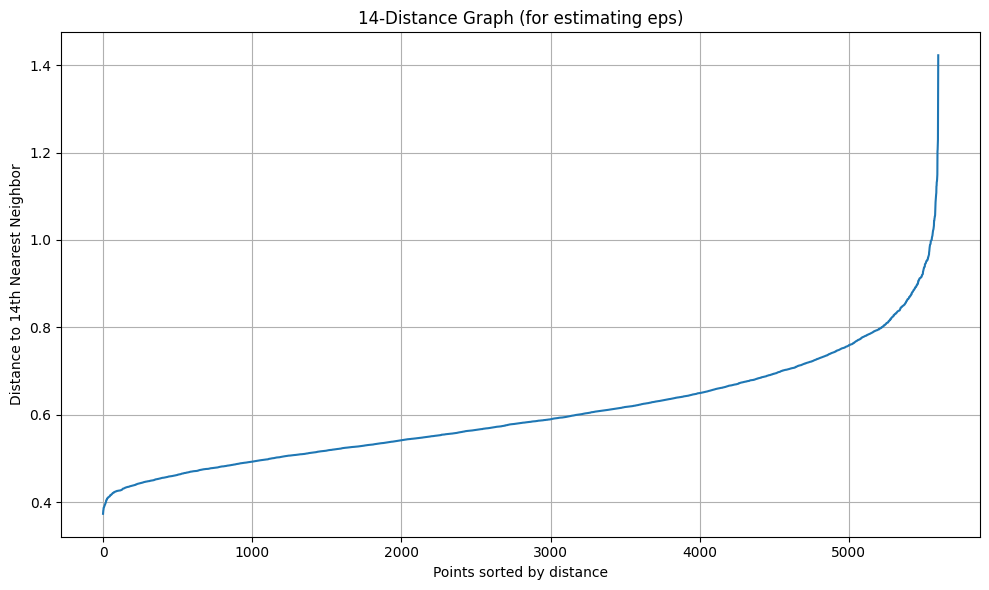


Using eps = 2.0 based on k-distance graph.

Applying DBSCAN...
DBSCAN completed.
Number of clusters found: 1
Number of noise points (label = -1): 0
Cluster distribution:
0    5600
Name: count, dtype: int64


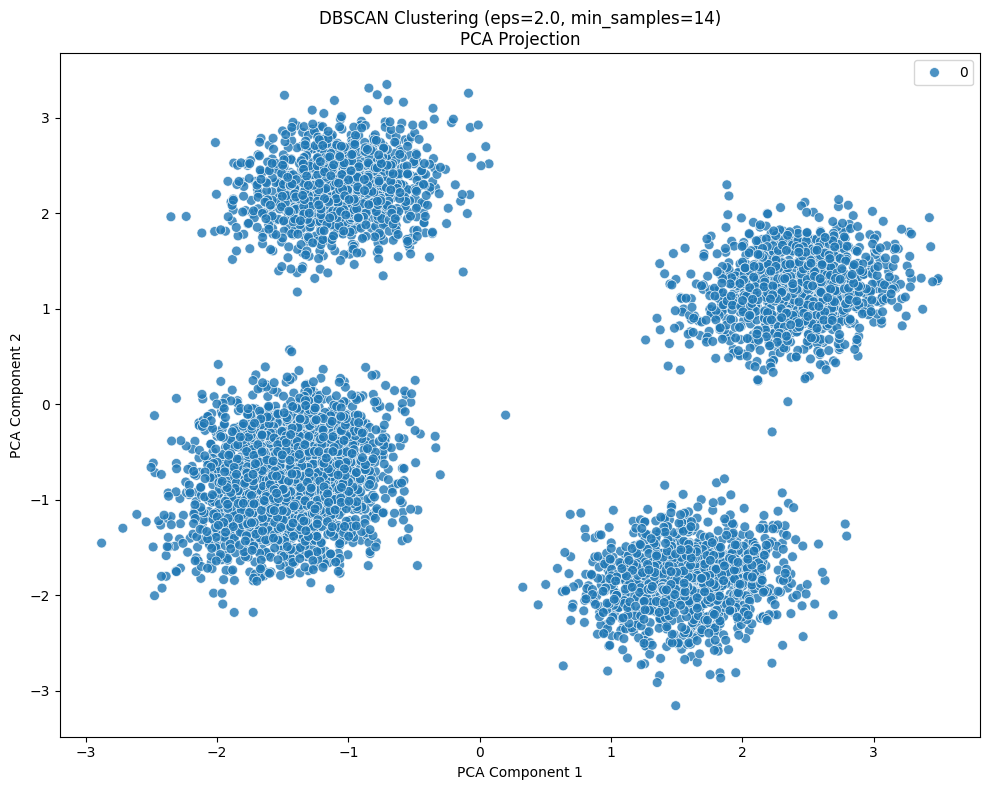


 Final DataFrame shape: (5600, 8)
Each row now has a DBSCAN cluster label in 'DBSCAN_Cluster'.
-1 = Noise point (outlier)

Number of inliers (clustered points): 5600
Number of outliers (noise): 0

First 10 rows with DBSCAN cluster labels:
   DBSCAN_Cluster  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0               0  -3.963840  10.465318   4.966742   3.464064  -6.802630   
1               0  -3.857778  14.116635   5.940324   0.210320  -4.071295   
2               0  -8.604347  -1.001196   0.660220  -1.021466   4.560815   
3               0  -5.111494  -4.900907  -2.705618   2.200669   3.136735   
4               0  -7.870395  -4.497651   2.714391  -3.598401   3.613323   
5               0  -4.523376   7.699819   2.765167  -1.366389  -3.350253   
6               0  11.147369  -1.981985   1.824157 -10.478425  10.481983   
7               0 -10.541738  -7.187515  -1.750122  -0.664341   7.284452   
8               0   9.627494  -0.060633   4.490009 -10.789597   7.624973   


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# -----------------------------------------------
# Step 1: Generate the same dataset (5600 rows, 7 columns)
# -----------------------------------------------
X, _ = make_blobs(n_samples=5600, centers=5, n_features=7, cluster_std=2.0, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(7)])

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# -----------------------------------------------
# Step 2: Standardize the data
# -----------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("\nData has been standardized.")

# -----------------------------------------------
# Step 3: Find optimal eps using k-distance graph
# Use min_samples = 2 * n_features (rule of thumb)
# -----------------------------------------------
min_samples = 2 * X_scaled.shape[1]  # 2 * 7 = 14
print(f"\nmin_samples (minPts) set to: {min_samples}")

# Compute distance to the 14th nearest neighbor for each point
neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

# Sort distances of the 14th neighbor
kth_distances = distances[:, -1]
kth_distances_sorted = np.sort(kth_distances, axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(kth_distances_sorted)
plt.title(f'{min_samples}-Distance Graph (for estimating eps)')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Suggestion: Choose eps at the "elbow"
# For this data, let's say eps ≈ 2.0 (adjust based on elbow)
eps_value = 2.0
print(f"\nUsing eps = {eps_value} based on k-distance graph.")

# -----------------------------------------------
# Step 4: Apply DBSCAN
# -----------------------------------------------
print("\nApplying DBSCAN...")
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

print("DBSCAN completed.")
print(f"Number of clusters found: {len(np.unique(dbscan_labels[dbscan_labels != -1]))}")
print(f"Number of noise points (label = -1): {np.sum(dbscan_labels == -1)}")
print("Cluster distribution:")
print(pd.Series(dbscan_labels).value_counts().sort_index())

# -----------------------------------------------
# Step 5: Visualize using PCA (2D projection)
# -----------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=dbscan_labels,
    palette='tab10',
    s=50,
    alpha=0.8,
    legend='full'
)

# Customize legend
handles, labels = scatter.get_legend_handles_labels()
if '-1' in labels or str(-1) in labels:
    labels[labels.index(str(-1))] = 'Noise'
    scatter.legend(handles, labels, title="Clusters")

plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples})\nPCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

# -----------------------------------------------
# Step 6: Analyze Clusters and Noise
# -----------------------------------------------
print(f"\n Final DataFrame shape: {df.shape}")
print("Each row now has a DBSCAN cluster label in 'DBSCAN_Cluster'.")
print("-1 = Noise point (outlier)")

# Example: Get non-noise data
core_and_border = df[df['DBSCAN_Cluster'] != -1]
noise = df[df['DBSCAN_Cluster'] == -1]

print(f"\nNumber of inliers (clustered points): {len(core_and_border)}")
print(f"Number of outliers (noise): {len(noise)}")

# Optional: Show first 10 rows with labels
print("\nFirst 10 rows with DBSCAN cluster labels:")
print(df[['DBSCAN_Cluster'] + [f'Feature_{i+1}' for i in range(7)]].head(10))

# Optional: Save to CSV
# df.to_csv('clustered_data_with_dbscan.csv', index=False)
# print("\nResults saved to 'clustered_data_with_dbscan.csv'")

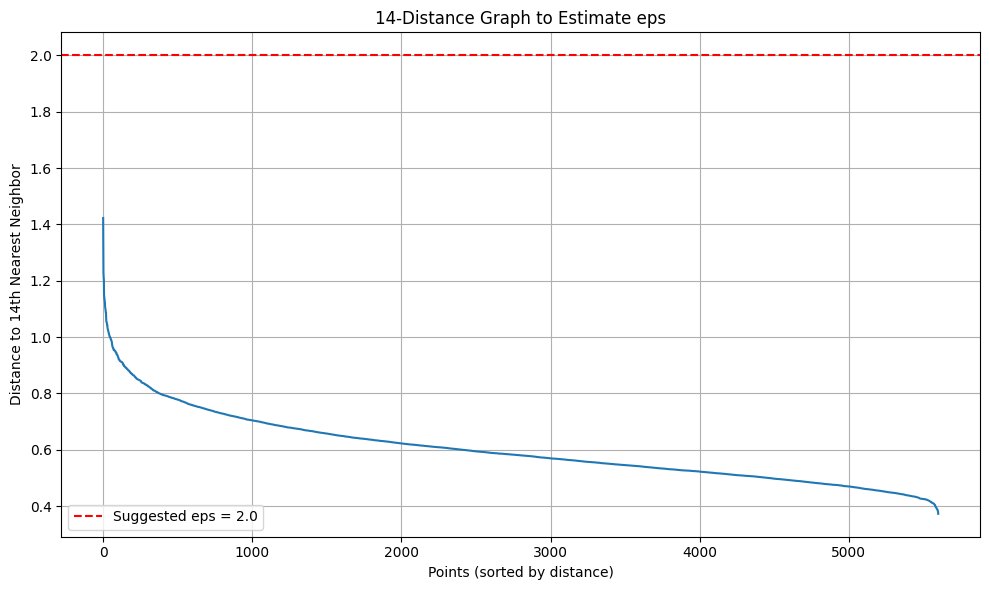

In [5]:
# Find Best `eps` Using k-Distance Graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

# Set random seed
np.random.seed(42)

# -----------------------------------------------
# Step 1: Generate dataset (same as before)
# -----------------------------------------------
X, _ = make_blobs(n_samples=5600, centers=5, n_features=7, cluster_std=2.0, random_state=42)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------------
# Step 2: Set minPts and compute k-distances
# -----------------------------------------------
minPts = 14  # = 2 * n_features

# Find distance to the 14th nearest neighbor for each point
nn = NearestNeighbors(n_neighbors=minPts)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

# Get the 14th distance for each point
kth_distances = distances[:, -1]  # Distance to 14th neighbor
sorted_kth_distances = np.sort(kth_distances)[::-1]  # Sort descending (DBSCAN convention)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_kth_distances)
plt.title(f'{minPts}-Distance Graph to Estimate eps')
plt.xlabel('Points (sorted by distance)')
plt.ylabel(f'Distance to {minPts}th Nearest Neighbor')
plt.grid(True)
plt.axhline(y=2.0, color='r', linestyle='--', label="Suggested eps = 2.0")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# -------------------------------
# Step 1: Generate Dataset (12,000 rows)
# Features: consumer_id, purchase_time, purchase_amount
# -------------------------------

def generate_dataset(n_customers=3000, n_rows=12000):
    """Generate a synthetic dataset for RFM analysis."""
    # Generate consumer IDs
    consumer_ids = np.random.choice(range(1, n_customers + 1), size=n_rows)

    # Generate purchase times over the last 365 days
    start_date = datetime.now() - timedelta(days=365)
    days_offset = np.random.randint(0, 365, size=n_rows)
    purchase_times = [start_date + pd.Timedelta(days=d) for d in days_offset]

    # Generate purchase amounts: skewed distribution (most small, some large)
    purchase_amounts = np.random.lognormal(mean=3.5, sigma=1.2, size=n_rows)
    purchase_amounts = np.clip(purchase_amounts, 10, 500)  # Min $10, Max $500

    # Create DataFrame
    df = pd.DataFrame({
        'consumer_id': consumer_ids,
        'purchase_time': purchase_times,
        'purchase_amount': purchase_amounts
    })

    # Sort by time
    df = df.sort_values('purchase_time').reset_index(drop=True)
    return df

df = generate_dataset()
print("Sample of raw data:")
print(df.head(10))

# -------------------------------
# Step 2: Calculate RFM Metrics
# -------------------------------

def calculate_rfm(df):
    """Calculate RFM metrics from transaction data."""
    # Reference date (one day after latest purchase)
    reference_date = df['purchase_time'].max() + timedelta(days=1)

    rfm_df = df.groupby('consumer_id').agg(
        Recency=('purchase_time', lambda x: (reference_date - x.max()).days),
        Frequency=('purchase_time', 'count'),
        Monetary=('purchase_amount', 'sum')
    ).reset_index()
    return rfm_df, reference_date

rfm_df, reference_date = calculate_rfm(df)
print("\nRFM Table (first 10 rows):")
print(rfm_df.head(10))

# -------------------------------
# Method 1: Quantile-based Scoring (8-bin equivalent, simplified to 5 bins)
# -------------------------------

def rfm_quantile_scorer(rfm_data):
    """Assign RFM scores using quantile-based segmentation."""
    rfm_score = rfm_data[['consumer_id', 'Recency', 'Frequency', 'Monetary']].copy()
    
    # Handle potential qcut errors
    try:
        # Recency: lower is better → higher score
        rfm_score['R'] = pd.qcut(rfm_score['Recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop').astype(int)
    except ValueError:
        rfm_score['R'] = pd.qcut(rfm_score['Recency'].rank(method='first'), q=5, labels=[5, 4, 3, 2, 1]).astype(int)
    
    try:
        # Frequency: higher is better → higher score
        rfm_score['F'] = pd.qcut(rfm_score['Frequency'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
    except ValueError:
        rfm_score['F'] = pd.qcut(rfm_score['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)
    
    try:
        # Monetary: higher is better → higher score
        rfm_score['M'] = pd.qcut(rfm_score['Monetary'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
    except ValueError:
        rfm_score['M'] = pd.qcut(rfm_score['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)
    
    # Total RFM Score
    rfm_score['RFM_Score'] = rfm_score['R'] + rfm_score['F'] + rfm_score['M']
    
    # Segment based on score
    def get_label(r, f, m):
        if r >= 4 and f >= 4 and m >= 4:
            return 'Champions'
        elif r >= 3 and f >= 3:
            return 'Loyal Customers'
        elif r >= 3:
            return 'Potential Loyalists'
        elif f >= 3:
            return 'Frequent Spenders'
        elif r + f + m >= 8:
            return 'Promising'
        elif r >= 2:
            return 'Needs Attention'
        else:
            return 'At Risk'
    
    rfm_score['Segment_Quantile'] = rfm_score.apply(lambda x: get_label(x['R'], x['F'], x['M']), axis=1)
    return rfm_score

# Apply quantile-based scoring
rfm_quantile = rfm_quantile_scorer(rfm_df)
print("\nRFM with Quantile-based Scoring (first 10):")
print(rfm_quantile[['consumer_id', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score', 'Segment_Quantile']].head(10))

# -------------------------------
# Method 2: K-means Clustering
# -------------------------------

def perform_kmeans_clustering(rfm_data, k=4):
    """Perform K-means clustering on RFM data."""
    # Prepare data for clustering
    X = rfm_data[['Recency', 'Frequency', 'Monetary']].copy()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Find optimal number of clusters using elbow method
    inertias = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertias, 'bo-', markersize=8, linewidth=2)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.tight_layout()
    plt.close()  # Close plot to free memory

    # Perform clustering with optimal k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Add cluster labels to RFM data
    rfm_kmeans = rfm_data.copy()
    rfm_kmeans['Cluster'] = cluster_labels
    return rfm_kmeans, kmeans

rfm_kmeans, kmeans_model = perform_kmeans_clustering(rfm_df)

# Analyze clusters
cluster_summary = rfm_kmeans.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nCluster Centers (average R, F, M):")
print(cluster_summary)

# Label clusters based on behavior
def label_cluster(row, cluster_centers):
    """Assign meaningful labels to clusters based on RFM characteristics."""
    cluster = int(row['Cluster'])
    r, f, m = row['Recency'], row['Frequency'], row['Monetary']
    cluster_r, cluster_f, cluster_m = cluster_centers.loc[cluster]

    # Compare with median of cluster centers for robust labeling
    r_median = cluster_centers['Recency'].median()
    f_median = cluster_centers['Frequency'].median()
    m_median = cluster_centers['Monetary'].median()

    if r < r_median and f > f_median and m > m_median:
        return 'Champions'
    elif r < r_median and f > f_median:
        return 'Loyal Customers'
    elif r < r_median:
        return 'Potential Loyalists'
    elif r > r_median and f < f_median:
        return 'At Risk'
    else:
        return 'Others'

# Apply labeling
rfm_kmeans['Segment_KMeans'] = rfm_kmeans.apply(label_cluster, axis=1, args=(cluster_summary,))
print("\nRFM with K-means Clustering (first 10):")
print(rfm_kmeans[['consumer_id', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_KMeans']].head(10))

# -------------------------------
# Optional: Visualize Clusters
# -------------------------------

def visualize_clusters(rfm_kmeans):
    """Visualize K-means clusters using PCA."""
    X = rfm_kmeans[['Recency', 'Frequency', 'Monetary']].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Reduce to 2D using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=rfm_kmeans['Cluster'], cmap='Set1', alpha=0.6)
    plt.title('K-means Clusters (PCA-reduced)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.tight_layout()
    plt.close()  # Close plot to free memory

visualize_clusters(rfm_kmeans)

# -------------------------------
# Final Output: Compare Both Methods
# -------------------------------

final_comparison = rfm_quantile[['consumer_id', 'R', 'F', 'M', 'RFM_Score', 'Segment_Quantile']].merge(
    rfm_kmeans[['consumer_id', 'Cluster', 'Segment_KMeans']],
    on='consumer_id'
)

print("\nFinal Comparison (first 10 rows):")
print(final_comparison.head(10))

Sample of raw data:
   consumer_id              purchase_time  purchase_amount
0          957 2024-09-01 11:08:57.842006        97.648311
1         2415 2024-09-01 11:08:57.842006        67.165664
2          891 2024-09-01 11:08:57.842006        10.000000
3         1789 2024-09-01 11:08:57.842006        46.254120
4         1538 2024-09-01 11:08:57.842006       154.775497
5          984 2024-09-01 11:08:57.842006        32.782787
6           39 2024-09-01 11:08:57.842006        10.000000
7         2551 2024-09-01 11:08:57.842006        10.560514
8          592 2024-09-01 11:08:57.842006        14.931966
9          321 2024-09-01 11:08:57.842006        45.518940

RFM Table (first 10 rows):
   consumer_id  Recency  Frequency    Monetary
0            1      146          2  128.954172
1            2        4          5  240.913163
2            3      150          3  361.061070
3            4       52          2   32.682899
4            5      166          2   99.240117
5            6       